In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from difflib import SequenceMatcher

In [6]:
bmv_emisora = "../modulo3/bmv_emisoras.csv" 
emisoras = pd.read_csv(bmv_emisora, index_col=0)
emisoras.index

Index(['AC', 'ACCELSA', 'ACTINVR', 'AEROMEX', 'AGRIEXP', 'AGUA', 'AHMSA',
       'ALEATIC', 'ALFA', 'ALPEK',
       ...
       'UNIFIN', 'URBI', 'VALUEGF', 'VASCONI', 'VESTA', 'VINTE', 'VISTA',
       'VITRO', 'VOLAR', 'WALMEX'],
      dtype='object', name='key', length=139)

In [7]:
ipc_path = "../modulo3/ipc.xlsx" 
market = pd.read_excel(ipc_path, index_col=0)
market.columns = [c.replace(" MF Equity", "").replace(" INDEX", "").replace("*", "") for c in market.columns]
market_t=market.T
market_t.index

Index(['KIMBERA', 'GAPB', 'CEMEXCPO', 'ASURB', 'GFNORTEO', 'KOFUBL', 'AC',
       'LABB', 'FEMSAUBD', 'OMAB', 'GFINBURO', 'AMXL', 'ALSEA', 'ORBIA',
       'PE&OLES', 'GRUMAB', 'RA', 'WALMEX', 'BOLSAA', 'LIVEPOLC', 'GENTERA',
       'IENOVA', 'CUERVO', 'ELEKTRA', 'BBAJIOO', 'ALPEKA', 'MEGACPO', 'GCC',
       'BIMBOA', 'GMEXICOB', 'GCARSOA1', 'TLEVICPO', 'ALFAA', 'BSMXB',
       'PINFRA', 'MEXBOL'],
      dtype='object')

In [21]:
# limpiando datos
data = {"nombre_market":[],"nombre_emisoras":[],"ratio":[]}
for x in market_t.index:
    for y in emisoras.index:
        ratio = SequenceMatcher(None, y, x[:-1]).ratio() 
        data["nombre_market"].append(x)
        data["nombre_emisoras"].append(y)
        data["ratio"].append(ratio)


df = pd.DataFrame(data)

match=df[df["ratio"] > 0.85]

In [22]:
# Cruzando la información con emisoras

matchemi = pd.merge(left=match, right=emisoras, left_on='nombre_emisoras', right_on='key')

In [25]:
# Base con la información deseada

base=matchemi[['nombre_market','nombre_emisoras','Sector']]
base.head()

,nombre_market,nombre_emisoras,Sector
0,KIMBERA,KIMBER,PRODUCTOS DE CONSUMO FRECUENTE
1,GAPB,GAP,INDUSTRIAL
2,ASURB,ASUR,INDUSTRIAL
3,GFNORTEO,GFNORTE,SERVICIOS FINANCIEROS
4,LABB,LAB,SALUD


In [31]:
#relacionamos la información de market_t y sector
sector_f = pd.merge(left=market_t,right=base, left_on=market_t.index, right_on='nombre_market')

#aplicamos doble indice 
sector_f.set_index(['Sector','nombre_market'],inplace=True)
sector_f.head()


2016-01-01 00:00:00  \
Sector                         nombre_market                        
PRODUCTOS DE CONSUMO FRECUENTE KIMBERA                      40.37   
INDUSTRIAL                     GAPB                        152.05   
                               ASURB                       243.89   
SERVICIOS FINANCIEROS          GFNORTEO                     94.99   
SALUD                          LABB                         13.85   

                                              2016-01-04 00:00:00  \
Sector                         nombre_market                        
PRODUCTOS DE CONSUMO FRECUENTE KIMBERA                      39.16   
INDUSTRIAL                     GAPB                        148.57   
                               ASURB                       238.29   
SERVICIOS FINANCIEROS          GFNORTEO                     91.79   
SALUD                          LABB                         14.41   

                                              2016-01-05 00:00:00  \
Sector                         nombre_market                        
PRODUCTOS DE CONSUMO FRECUENTE KIMBERA                      38.89   
INDUSTRIAL                     GAPB                        147.93   
                               ASURB                       233.03   
SERVICIOS FINANCIEROS          GFNORTEO                     91.72   
SALUD                          LABB                         13.77   

                                              2016-01-06 00:00:00  \
Sector                         nombre_market                        
PRODUCTOS DE CONSUMO FRECUENTE KIMBERA                      39.13   
INDUSTRIAL                     GAPB                        146.99   
                               ASURB                       231.97   
SERVICIOS FINANCIEROS          GFNORTEO                     91.63   
SALUD                          LABB                         13.65   

                                              2016-01-07 00:00:00  \
Sector                         nombre_market                        
PRODUCTOS DE CONSUMO FRECUENTE KIMBERA                      39.16   
INDUSTRIAL                     GAPB                        141.32   
                               ASURB                       230.71   
SERVICIOS FINANCIEROS          GFNORTEO                     89.54   
SALUD                          LABB                         13.25   

                                              2016-01-08 00:00:00  \
Sector                         nombre_market                        
PRODUCTOS DE CONSUMO FRECUENTE KIMBERA                      38.65   
INDUSTRIAL                     GAPB                        143.74   
                               ASURB                       229.76   
SERVICIOS FINANCIEROS          GFNORTEO                     88.85   
SALUD                          LABB                         13.05   

                                              2016-01-11 00:00:00  \
Sector                         nombre_market                        
PRODUCTOS DE CONSUMO FRECUENTE KIMBERA                      37.85   
INDUSTRIAL                     GAPB                        144.94   
                               ASURB                       227.83   
SERVICIOS FINANCIEROS          GFNORTEO                     89.30   
SALUD                          LABB                         13.26   

                                              2016-01-12 00:00:00  \
Sector                         nombre_market                        
PRODUCTOS DE CONSUMO FRECUENTE KIMBERA                      39.08   
INDUSTRIAL                     GAPB                        144.16   
                               ASURB                       231.81   
SERVICIOS FINANCIEROS          GFNORTEO                     89.34   
SALUD                          LABB                         13.45   

                                              2016-01-13 00:00:00  \
Sector                         nombre_market                        
PRODUCTOS DE CONSUMO FRECUENTE KIMBE

In [32]:
#agrupamos por Sector y calculamos su media
sector_f = sector_f.groupby(level="Sector").mean()
sector_mean= sector_f.T
sector_mean.head()


Sector,ENERGÍA,INDUSTRIAL,MATERIALES,PRODUCTOS DE CONSUMO FRECUENTE,SALUD,SERVICIOS DE TELECOMUNICACIONES,SERVICIOS FINANCIEROS,SERVICIOS Y BIENES DE CONSUMO NO BÁSICO
2016-01-01 00:00:00,72.34,117.845714,79.400000,92.8900,13.85,12.12,50.148333,216.333333
2016-01-04 00:00:00,72.98,116.128571,78.490000,90.8625,14.41,12.03,49.115000,212.393333
2016-01-05 00:00:00,71.48,115.488571,78.806667,90.1050,13.77,11.97,48.971667,209.043333
2016-01-06 00:00:00,70.94,114.577143,76.923333,92.7150,13.65,11.74,48.645000,202.943333
2016-01-07 00:00:00,72.31,112.128571,76.736667,92.2475,13.25,11.34,47.453333,200.226667


In [33]:
#calculamos la media por cada fecha
sector_mean['mean_s'] = sector_mean.mean(axis=1)
sector_mean.head()



Sector,ENERGÍA,INDUSTRIAL,MATERIALES,PRODUCTOS DE CONSUMO FRECUENTE,SALUD,SERVICIOS DE TELECOMUNICACIONES,SERVICIOS FINANCIEROS,SERVICIOS Y BIENES DE CONSUMO NO BÁSICO,mean_s
2016-01-01 00:00:00,72.34,117.845714,79.400000,92.8900,13.85,12.12,50.148333,216.333333,81.865923
2016-01-04 00:00:00,72.98,116.128571,78.490000,90.8625,14.41,12.03,49.115000,212.393333,80.801176
2016-01-05 00:00:00,71.48,115.488571,78.806667,90.1050,13.77,11.97,48.971667,209.043333,79.954405
2016-01-06 00:00:00,70.94,114.577143,76.923333,92.7150,13.65,11.74,48.645000,202.943333,79.016726
2016-01-07 00:00:00,72.31,112.128571,76.736667,92.2475,13.25,11.34,47.453333,200.226667,78.211592


In [34]:
# Limpiando información
y = (sector_mean["mean_s"].diff().shift(-1) > 0) *1.0
X = sector_mean.drop("mean_s", axis=1).join(y, how="inner")

y = X["mean_s"]
X = X.drop("mean_s", axis=1)


In [35]:
#se generan los train y el test
train_period = "2019-10"
test_period = "2019-11-20"
Xtrain, ytrain = X[:train_period], y[:train_period]
Xtest, ytest = X[:test_period], y[:test_period]


In [36]:
y.value_counts()

0.0    534
1.0    512
Name: mean_s, dtype: int64

In [38]:
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve


In [39]:
# Crea la regresión logistica
logistic = LogisticRegression(solver='lbfgs',max_iter=700)
penalty = ['l2']

# Se crea la regularización del espacio del hiperparametro
C = np.logspace(0, 2, 200)

# Crear opciones de hiperparámetro
hyperparameters = dict(C=C, penalty=penalty)

# Crea una búsqueda de cuadrícula utilizando la validación cruzada de 5
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Ajustamos la busqueda
best_model = clf.fit(Xtrain, ytrain)


In [41]:
#se genera el modelo predictivo
yhat = best_model.predict(Xtest)


In [42]:
#se genera la matriz de confusión
confusion_matrix(ytest, yhat, labels=[0, 1])


array([[323, 192],
       [284, 215]], dtype=int64)

In [43]:
#se calcula la precision
precision_score(ytest, yhat)


0.5282555282555282

In [44]:
#se calcula el recall
recall_score(ytest, yhat)


0.4308617234468938

In [45]:
#se calcula el F1
f1_score(ytest, yhat)


0.4746136865342163

Text(0.5, 0, 'Nivel de proba asignada')

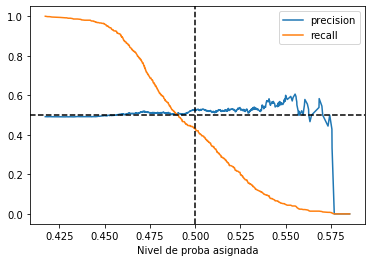

In [46]:
#se grafica la precision_recall_curve
proba_estimate = best_model.predict_proba(Xtest)[:, 1]
prec, recall, threshold = precision_recall_curve(ytest, proba_estimate)

plt.plot(threshold, prec[:-1], label="precision")
plt.plot(threshold, recall[:-1], label="recall")
plt.legend()
plt.axvline(x=0.5, linestyle="--", c="black")
plt.axhline(y=0.5, linestyle="--", c="black")
plt.xlabel("Nivel de proba asignada")
